In [2]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear Regression 
### Normal equation

In [3]:
import numpy as np 

np.random.seed(42) 
m = 100 
X = 2 * np.random.rand(m, 1) 
y = 4 + 3 * X + np.random.randn(m, 1)

In [5]:
X.shape

(100, 1)

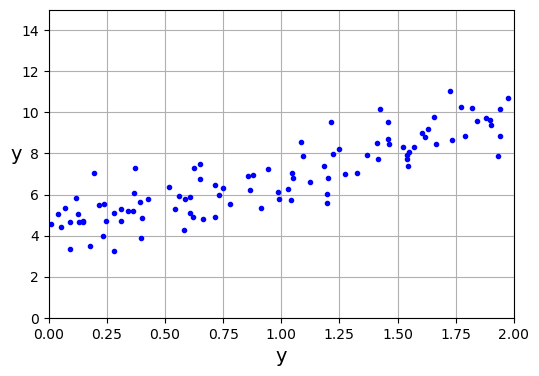

In [7]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')
plt.xlabel('y')
plt.ylabel('y', rotation=0)
plt.grid()
plt.axis([0,2,0, 15])
plt.show()

In [ ]:
# computing the normal equation 
# inv() is inverse of matrix 
# dot() is dot product 

from sklearn.preprocessing import add_dummy_feature 

X_b = add_dummy_feature(X) # add x0 = 1 to each instance 

In [10]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [11]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [14]:
theta_best =  np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y 
# @ is matrix multiplication same as np.matmul(A, B)
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [16]:
''' our y function starts with y = 4 + 3x + noise 
we wanted our theta_best to be as close as possible to 4, 3 but 
we see that the noise played a role. Generally the smaller and noisier 
the dataset is the harder it will be to get the best values'''

' our y function starts with y = 4 + 3x + noise \nwe wanted our theta_best to be as close as possible to 4, 3 but \nwe see that the noise played a role. Generally the smaller and noisier \nthe dataset is the harder it will be to get the best values'

In [17]:
X_b.shape, y.shape

((100, 2), (100, 1))

In [18]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
print(X_new.shape, X_new_b.shape)
y_predict = X_new_b @ theta_best 
y_predict

(2, 1) (2, 2)


array([[4.21509616],
       [9.75532293]])

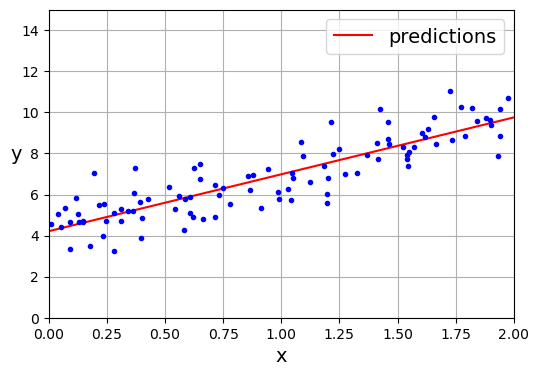

In [22]:
plt.figure(figsize=(6,4))
plt.plot(X_new, y_predict,  'r-', label='predictions')
plt.plot(X, y, 'b.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.axis([0,2, 0, 15])
plt.legend()
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ 


(array([4.21509616]), array([[2.77011339]]))

In [24]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [25]:
# bias term and feature weights are separated since numpy called 
# scipy.linalg.lstsq() (least squares)

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [26]:
# the above function is theta = x^+ * y where x^+ is the pseudoinverse 
# also called the Moore-Penrose inverse 

np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [27]:
""" pseudoinverse itself is computed using the singular value decomposition that decompose the training set matrix into three separate matrix. See numpy.linalg.svd(). But this is done because it is more efficient then the computing the normal equation as well as handles edge cases extremely well (e.g when a matrix cannot be inverted the pseudoinvese will still be defined"""

' pseudoinverse itself is computed using the singular value decomposition that decompose the training set matrix into three separate matrix. See numpy.linalg.svd(). But this is done because it is more efficient then the computing the normal equation as well as handles edge cases extremely well (e.g when a matrix cannot be inverted the pseudoinvese will still be defined'